In [8]:
## import useful packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [9]:
# read from the data csv
df = pd.read_csv('electrical_stability.csv') 
df # whenever stab >0, stabf = unstable and stab <0, stabf = stable

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [10]:
# Checking for null values in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [11]:
# Dummy values for the 'stabf' column: stabf has two outputs given by 1. stable 2. unstable
dummy_columns = df.select_dtypes(include='object').columns # columns to dummify: stabf is the only categorical value
df_dummies = pd.get_dummies(df, prefix=dummy_columns)
df_dummies

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf_stable,stabf_unstable
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,0,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,1,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,0,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,0,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,0,1
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,1,0
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,1,0
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,0,1


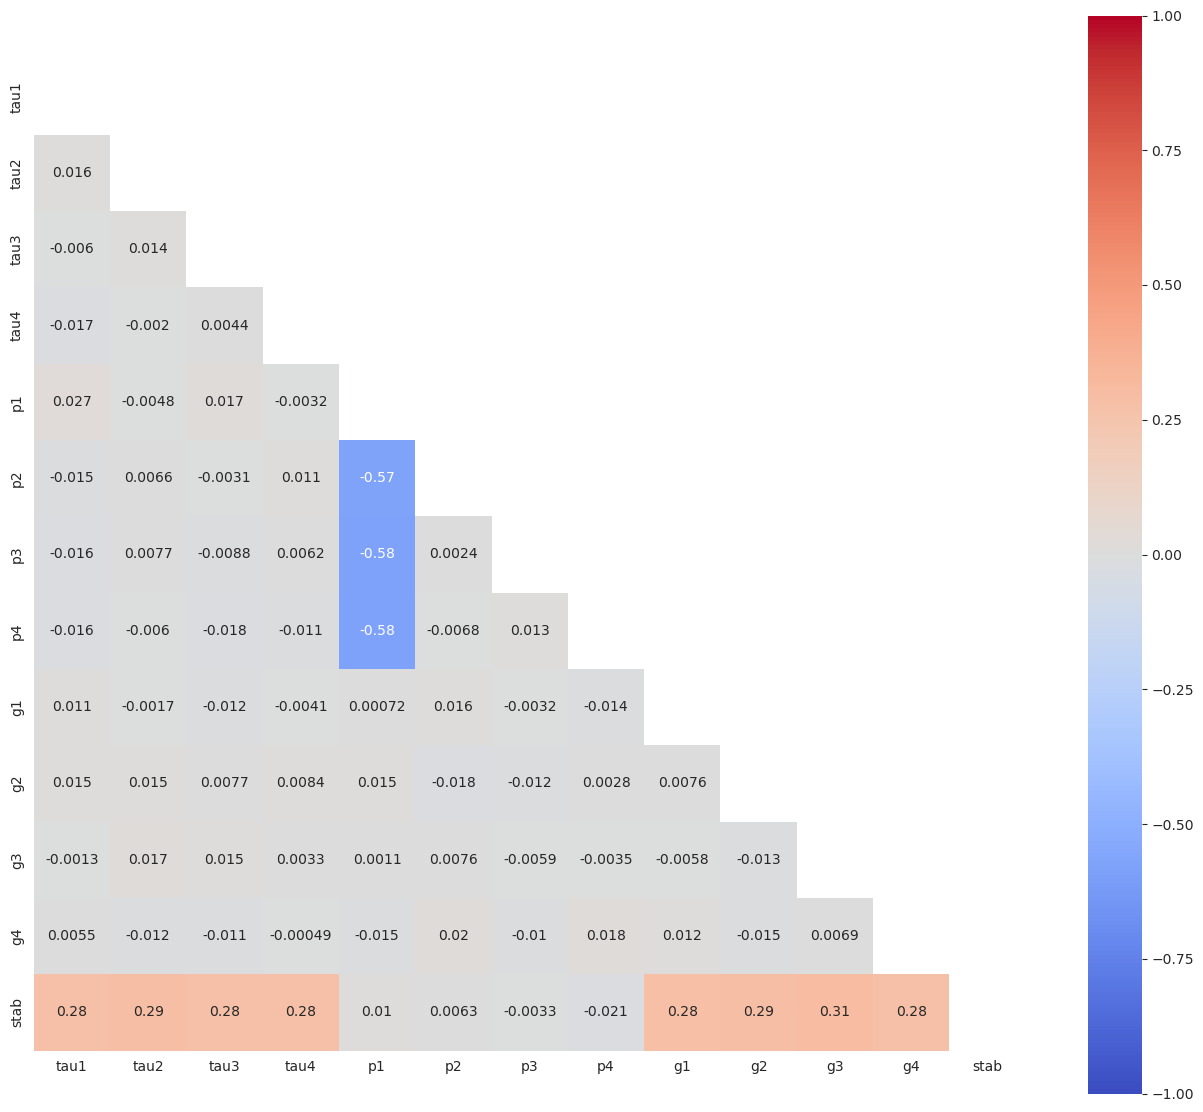

In [12]:
# correlation heat map: the first insight into the data
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True # trick to filter out the upper-right triangle, which is redundant due to symmetry
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 14))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [ ]:
ss = StandardScaler()
stab_transformed = ss.fit_transform(df['stab'].to_numpy().reshape(-1,1))
g = sns.scatterplot(x=df["tau1"][:50], y=df["stab"])
g.set_yticks(range(3)) # <--- set the ticks first
g.set_yticklabels(['-1','0','1'])



In [16]:
## Prediction and modeling

# test-train split
RAND_STATE = 34 # for reproducible shuffling
TT_RATIO = 0.3 # test/train

X = df.drop('stab', axis=1).drop('stabf', axis=1) # all the variables, except 'stab' and 'stabf'
y = df.stab # 'stab' is our numerical output variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE) # test-train split
X_train = pd.DataFrame(X_train) 
X_test = pd.DataFrame(X_test)
X_train

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
3525,6.779586,9.645920,6.081267,2.938359,2.696722,-0.560577,-0.744007,-1.392139,0.529549,0.639056,0.248268,0.285098
3552,2.906158,2.353506,8.656880,7.791775,4.771677,-1.070059,-1.808350,-1.893268,0.874054,0.190984,0.575123,0.884996
8386,2.761585,8.083490,4.462225,3.233779,2.380218,-0.721113,-0.662311,-0.996794,0.554623,0.265914,0.800701,0.762960
3890,5.805414,2.967451,0.940879,5.790054,3.348182,-0.764950,-0.720584,-1.862649,0.614167,0.262535,0.785686,0.816913
2964,9.370860,5.091508,4.424997,3.130762,3.038531,-1.498283,-1.034419,-0.505829,0.292611,0.884063,0.525081,0.724847
...,...,...,...,...,...,...,...,...,...,...,...,...
5667,1.402361,5.230461,3.208440,6.245803,4.499151,-1.897797,-1.224031,-1.377323,0.191743,0.056872,0.485068,0.457570
324,5.320568,8.716404,1.536095,3.678266,4.493076,-0.975993,-1.685787,-1.831296,0.559361,0.314927,0.515460,0.762985
3157,2.813323,4.874665,3.106507,1.181535,3.761259,-1.396957,-0.623898,-1.740404,0.593478,0.574453,0.995202,0.996156
5993,3.891782,5.541850,3.117940,8.496899,3.201669,-1.287812,-0.778307,-1.135550,0.112842,0.779447,0.714645,0.462056
